In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
folder_path = "Scraped_datasets/"

file_names = ["imdb_scraped_data_action.csv",
              "imdb_scraped_data_comedy.csv",
              "imdb_scraped_data_crime.csv",
              "imdb_scraped_data_drama.csv",
              "imdb_scraped_data_horror.csv",
              "imdb_scraped_data_thriller.csv",
              "imdb_scraped_data_scifi.csv"]

file_paths = [folder_path + file_name for file_name in file_names]

df_combined = pd.concat([pd.read_csv(file_path) for file_path in file_paths], ignore_index=True)

In [3]:
df_combined

,Number,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,1.,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,2.,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,3.,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,4.,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,5.,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
12975,57.0,World War Z,(2013),116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,58.0,2001: A Space Odyssey,(1968),149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,59.0,The Hunger Games: Catching Fire,(2013),146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,60.0,Spider-Man: Homecoming,(2017),133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [4]:
df_combined = df_combined.drop(columns=["Number"])
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,(2008),152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,(2010),148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,(1999),136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,(2003),201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
12975,World War Z,(2013),116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,2001: A Space Odyssey,(1968),149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,The Hunger Games: Catching Fire,(2013),146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,Spider-Man: Homecoming,(2017),133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [5]:
df_combined["Year"] = df_combined["Year"].str.replace(r'\D', '', regex=True).astype(str)
df_combined["Year"] = df_combined["Year"].str.replace(r'', '')
df_combined["Year"] = df_combined["Year"].str.replace(r'I', '', regex=True)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
12975,World War Z,2013,116 min,Action - Adventure - Horror,7.0,"$190,000,000","202,359,711",685861,63.0
12976,2001: A Space Odyssey,1968,149 min,Adventure - Sci-Fi,8.3,"$12,000,000","56,954,992",683552,84.0
12977,The Hunger Games: Catching Fire,2013,146 min,Action - Adventure - Sci-Fi,7.5,"$130,000,000","424,668,047",682086,76.0
12978,Spider-Man: Homecoming,2017,133 min,Action - Adventure - Sci-Fi,7.4,"$175,000,000","334,201,140",677261,73.0


In [6]:
len(df_combined.loc[df_combined.duplicated(subset =  ["Title", "Rating", "Runtime"]),:])

4883

In [7]:
df_combined.drop_duplicates(subset = ["Title", "Rating", "Runtime"], keep = "first", inplace=True)

In [8]:
df_combined.reset_index(inplace = True)
df_combined

,index,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
8092,12914,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,12915,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,12918,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,12930,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [9]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("index")]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [10]:
df_combined.head(15)

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
5,The Dark Knight Rises,2012,164 min,Action - Drama - Thriller,8.4,"$250,000,000","448,139,099",1737213,78.0
6,The Lord of the Rings: The Two Towers,2002,179 min,Action - Adventure - Drama,8.8,"$94,000,000","342,551,365",1699229,87.0
7,Gladiator,2000,155 min,Action - Adventure - Drama,8.5,"$103,000,000","187,705,427",1531948,67.0
8,Batman Begins,2005,140 min,Action - Crime - Drama,8.2,"$150,000,000","206,852,432",1499318,70.0
9,The Avengers,2012,143 min,Action - Sci-Fi,8.0,"$220,000,000","623,279,547",1412844,69.0


In [11]:
df_combined.tail(15)

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
8082,Red Road,2006,113 min,Drama - Mystery - Thriller,6.8,NaN,"153,432",13361,73.0
8083,Manhattan Night,2016,113 min,Crime - Drama - Mystery,6.2,NaN,NaN,13350,44.0
8084,Te3n,2016,136 min,Drama - Mystery - Thriller,7.2,NaN,"258,066",13350,NaN
8085,Table No. 21,2013,108 min,Adventure - Drama - Thriller,7.2,NaN,"31,658",13347,NaN
8086,Ittefaq,2017,105 min,Crime - Mystery - Thriller,7.2,"₹290,000,000","298,032",13346,NaN
8087,Law of Desire,1987,102 min,Comedy - Drama - Thriller,7.1,NaN,NaN,13299,NaN
8088,Arkansas,2020,117 min,Crime - Thriller,6.0,NaN,NaN,13281,55.0
8089,Beyond a Reasonable Doubt,2009,106 min,Crime - Drama - Mystery,5.8,"$25,000,000","32,409",13271,35.0
8090,Roja,1992,137 min,Drama - Romance - Thriller,8.1,NaN,NaN,13250,NaN
8091,My Son,2021,95 min,Crime - Drama - Mystery,6.0,NaN,NaN,13228,NaN


In [12]:
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [13]:
df_combined = df_combined[df_combined["Year"] != "nan"]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [14]:
df_combined = df_combined[df_combined["Year"] != "2024"]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [15]:
df_combined = df_combined.dropna(subset=["Runtime"])
df_combined.reset_index(inplace = True)
df_combined

,index,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...,...
8091,8092,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8092,8093,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8093,8094,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8094,8095,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [16]:
df_combined = df_combined.loc[:, ~df_combined.columns.str.contains("index")]
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8091,The Bad Sleep Well,1960,151 min,Crime - Drama - Thriller,8.0,NaN,NaN,13228,NaN
8092,Vavien,2009,100 min,Comedy - Drama - Thriller,7.5,NaN,NaN,13213,NaN
8093,Trapped,2016,105 min,Drama - Thriller,7.5,NaN,NaN,13171,NaN
8094,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [17]:
A = ["Budget", "Metascore", "Gross US & Canada"]
en_az_bir_bos_hucre_sayisi = df_combined[A].isnull().any(axis=1).sum()
print(en_az_bir_bos_hucre_sayisi)

3056


In [18]:
bos_satirlar = df_combined[df_combined[A].isna().any(axis=1)]
print(len(bos_satirlar))

3056


In [19]:
Nan_delete = ["Budget", "Metascore", "Gross US & Canada"]
df_combined = df_combined.dropna(subset = Nan_delete)

In [20]:
df_combined.isnull().sum()

Title                0
Year                 0
Runtime              0
Genre                0
Rating               0
Budget               0
Gross US & Canada    0
Votes                0
Metascore            0
dtype: int64

In [21]:
df_combined.shape

(5040, 9)

In [22]:
df_combined = df_combined .drop(df_combined[~df_combined["Budget"].str.startswith("$")].index)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore
0,The Dark Knight,2008,152 min,Action - Crime - Drama,9.0,"$185,000,000","534,858,444",2710261,84.0
1,Inception,2010,148 min,Action - Adventure - Sci-Fi,8.8,"$160,000,000","292,576,195",2405851,74.0
2,The Matrix,1999,136 min,Action - Sci-Fi,8.7,"$63,000,000","171,479,930",1952536,73.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,Action - Adventure - Drama,8.8,"$93,000,000","315,544,750",1911195,92.0
4,The Lord of the Rings: The Return of the King,2003,201 min,Action - Adventure - Drama,9.0,"$94,000,000","377,845,905",1882385,94.0
...,...,...,...,...,...,...,...,...,...
8058,The Crossing Guard,1995,111 min,Drama - Thriller,6.3,"$9,000,000","832,910",14017,46.0
8068,Owning Mahowny,2003,104 min,Crime - Drama - Thriller,7.0,"$10,000,000","1,011,054",13778,70.0
8088,Beyond a Reasonable Doubt,2009,106 min,Crime - Drama - Mystery,5.8,"$25,000,000","32,409",13271,35.0
8094,WALL·E,2008,98 min,Animation - Adventure - Family,8.4,"$180,000,000","223,808,164",1139700,95.0


In [23]:
df_combined.shape

(4852, 9)

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4852 entries, 0 to 8095
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4852 non-null   object 
 1   Year               4852 non-null   object 
 2   Runtime            4852 non-null   object 
 3   Genre              4852 non-null   object 
 4   Rating             4852 non-null   float64
 5   Budget             4852 non-null   object 
 6   Gross US & Canada  4852 non-null   object 
 7   Votes              4852 non-null   int64  
 8   Metascore          4852 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 379.1+ KB


In [25]:
df_combined["Year"] = df_combined["Year"].astype("int64")

In [26]:
df_combined['Runtime'] = df_combined["Runtime"].str.replace(" min", "").astype("int64")

In [27]:
df_combined["Budget"] = df_combined["Budget"].str.replace("$", "").str.replace(",", "").astype("float64")

C:\Users\huawei\AppData\Local\Temp\ipykernel_4168\2402471335.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_combined["Budget"] = df_combined["Budget"].str.replace("$", "").str.replace(",", "").astype("float64")


In [28]:
df_combined["Gross US & Canada"] = df_combined["Gross US & Canada"].str.replace(",", "").astype('float64')

In [29]:
df_combined.reset_index(drop=True, inplace=True)

In [30]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4852 non-null   object 
 1   Year               4852 non-null   int64  
 2   Runtime            4852 non-null   int64  
 3   Genre              4852 non-null   object 
 4   Rating             4852 non-null   float64
 5   Budget             4852 non-null   float64
 6   Gross US & Canada  4852 non-null   float64
 7   Votes              4852 non-null   int64  
 8   Metascore          4852 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 341.3+ KB


In [31]:
df_combined.nunique()

Title                4747
Year                   90
Runtime               131
Genre                 306
Rating                 71
Budget                422
Gross US & Canada    4802
Votes                4806
Metascore              92
dtype: int64

In [32]:
print(df_combined["Genre"].value_counts().head(10))

Comedy -  Drama -  Romance          242
Action -  Crime -  Drama            167
Comedy -  Drama                     164
Animation -  Adventure -  Comedy    156
Action -  Adventure -  Sci-Fi       129
Action -  Adventure -  Comedy       125
Comedy                              121
Drama -  Romance                    108
Drama                               108
Crime -  Drama -  Thriller          106
Name: Genre, dtype: int64


---

In [33]:
df_combined["Clear_Genre"] = df_combined["Genre"].str.replace("-", "").str.split(" - ")

categories = set()
for genres in df_combined["Clear_Genre"]:
    categories.update(genres)
df_combined["Clear_Genre"] = df_combined["Clear_Genre"].apply(lambda x: "-".join(sorted(x)))


genres_dummies = df_combined["Clear_Genre"].str.get_dummies(sep=" ")

In [34]:
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama
...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family


In [35]:
genres_dummies

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4848,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4849,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4850,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genres_dummies["Action"].sum()

1529

In [37]:
genres_dummies["Comedy"].sum()

1802

In [38]:
genres_dummies["SciFi"].sum()

442

In [39]:
genres_dummies["Adventure"].sum()

1070

---

In [40]:
genres_dummies.to_csv("imdb_scraped_data_all_clear_genre.csv", index = False)

In [41]:
df_combined.to_csv("imdb_scraped_data_all.csv", index = False)

In [42]:
df_combined['Revenue'] = df_combined['Gross US & Canada'] - df_combined['Budget']
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Revenue
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama,349858444.0
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi,132576195.0
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,108479930.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,222544750.0
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,283845905.0
...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller,-8167090.0
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller,-8988946.0
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery,-24967591.0
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,43808164.0


In [43]:
negative_revenue_count = df_combined['Revenue'].lt(0).sum()
print("The number of non-profitable movie projects are: ", negative_revenue_count)

The number of non-profitable movie projects are:  1920


In [44]:
df_fail_movies = df_combined[df_combined['Revenue'] < 0]
df_fail_movies = df_fail_movies.sort_values('Rating', ascending=False)
df_fail_movies

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Revenue
3403,Fight Club,1999,139,Drama,8.8,63000000.0,37030102.0,2179810,66.0,Drama,-25969898.0
3465,The Pianist,2002,150,Biography - Drama - Music,8.5,35000000.0,32572577.0,853393,85.0,Biography Drama Music,-2427423.0
2698,American History X,1998,119,Crime - Drama,8.5,20000000.0,6719864.0,1140963,62.0,Crime Drama,-13280136.0
1757,City Lights,1931,87,Comedy - Drama - Romance,8.5,1500000.0,19181.0,188190,99.0,Comedy Drama Romance,-1480819.0
1661,Modern Times,1936,87,Comedy - Drama - Romance,8.5,1500000.0,163245.0,247754,96.0,Comedy Drama Romance,-1336755.0
...,...,...,...,...,...,...,...,...,...,...,...
879,Battlefield Earth,2000,118,Action - Adventure - Sci-Fi,2.5,73000000.0,21471685.0,81371,9.0,Action Adventure SciFi,-51528315.0
1124,Alone in the Dark,2005,96,Action - Horror - Sci-Fi,2.4,20000000.0,5178569.0,46178,9.0,Action Horror SciFi,-14821431.0
2343,Son of the Mask,2005,94,Comedy - Family - Fantasy,2.2,84000000.0,17018422.0,57607,20.0,Comedy Family Fantasy,-66981578.0
1180,House of the Dead,2003,90,Action - Adventure - Horror,2.1,12000000.0,10249719.0,37850,15.0,Action Adventure Horror,-1750281.0


In [45]:
pd.set_option('display.max_rows', 200)
df_combined.head(200)

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Revenue
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama,349858444.0
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi,132576195.0
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,108479930.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,222544750.0
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,283845905.0
5,The Dark Knight Rises,2012,164,Action - Drama - Thriller,8.4,250000000.0,448139099.0,1737213,78.0,Action Drama Thriller,198139099.0
6,The Lord of the Rings: The Two Towers,2002,179,Action - Adventure - Drama,8.8,94000000.0,342551365.0,1699229,87.0,Action Adventure Drama,248551365.0
7,Gladiator,2000,155,Action - Adventure - Drama,8.5,103000000.0,187705427.0,1531948,67.0,Action Adventure Drama,84705427.0
8,Batman Begins,2005,140,Action - Crime - Drama,8.2,150000000.0,206852432.0,1499318,70.0,Action Crime Drama,56852432.0
9,The Avengers,2012,143,Action - Sci-Fi,8.0,220000000.0,623279547.0,1412844,69.0,Action SciFi,403279547.0


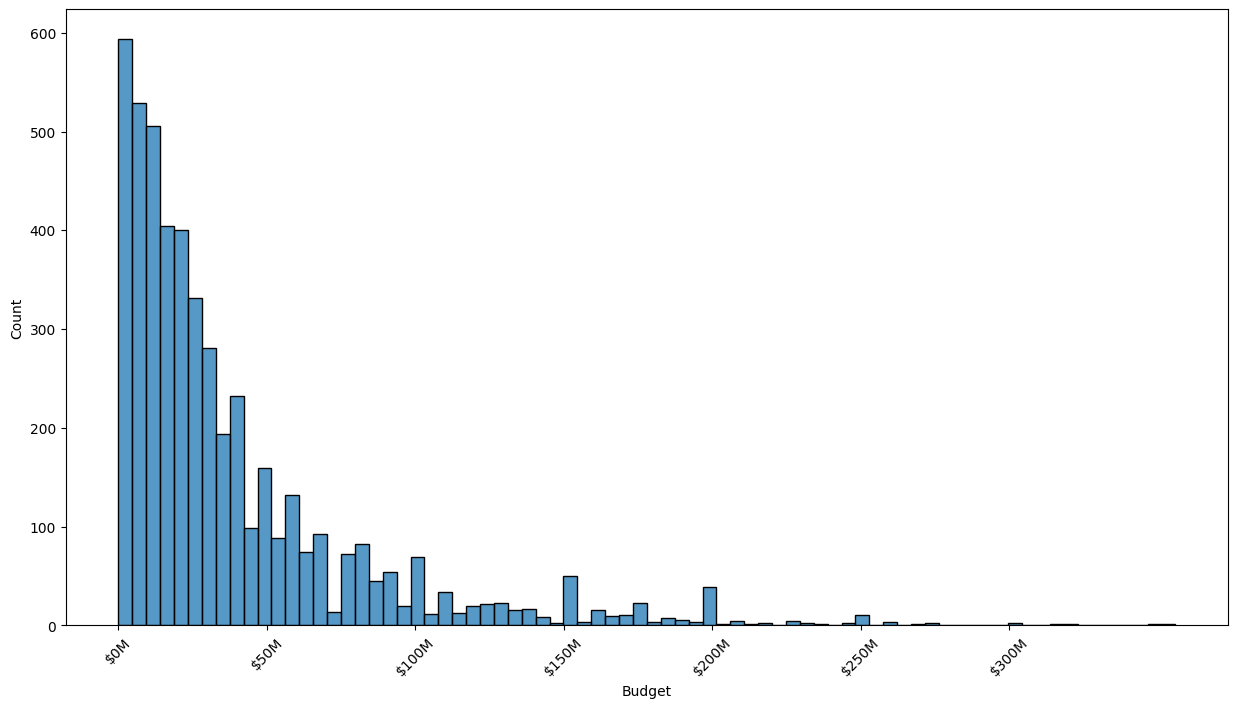

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 8])
sns.histplot(df_combined['Budget'])
plt.xticks([0, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 300_000_000,], ['$0M', '$50M', '$100M', '$150M', '$200M', '$250M', '$300M'], rotation=45)
plt.show()

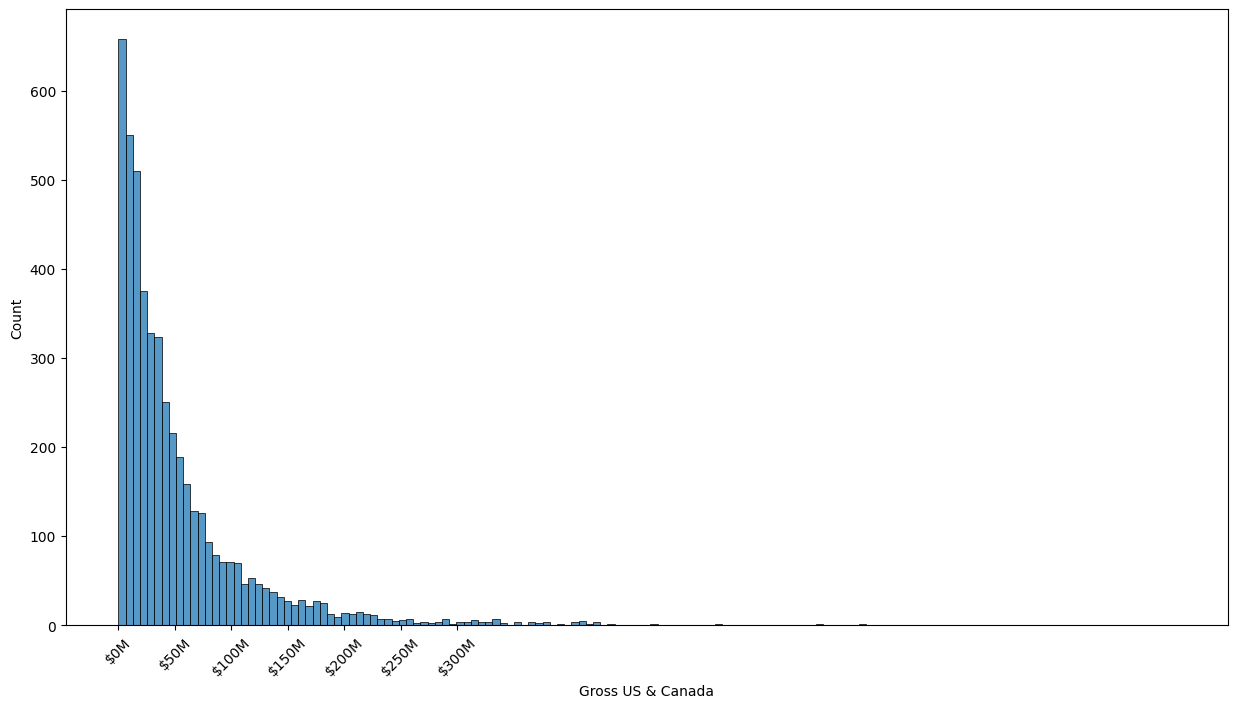

In [48]:
plt.figure(figsize=[15, 8])
sns.histplot(df_combined['Gross US & Canada'])
plt.xticks([0, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 300_000_000,], ['$0M', '$50M', '$100M', '$150M', '$200M', '$250M', '$300M'], rotation=45)
plt.show()

In [49]:
df_combined = df_combined.reset_index(drop=True)
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Revenue
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,84.0,Action Crime Drama,349858444.0
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,74.0,Action Adventure SciFi,132576195.0
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,73.0,Action SciFi,108479930.0
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,92.0,Action Adventure Drama,222544750.0
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,94.0,Action Adventure Drama,283845905.0
...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,46.0,Drama Thriller,-8167090.0
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,70.0,Crime Drama Thriller,-8988946.0
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,35.0,Crime Drama Mystery,-24967591.0
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,95.0,Animation Adventure Family,43808164.0


In [54]:
df_combined['Metascore'] = df_combined['Metascore'] / 100

In [55]:
df_combined['Score'] = df_combined['Rating'] + df_combined['Metascore']

In [56]:
df_combined['Score'] = df_combined['Score'] / 2
df_combined

,Title,Year,Runtime,Genre,Rating,Budget,Gross US & Canada,Votes,Metascore,Clear_Genre,Revenue,Score
0,The Dark Knight,2008,152,Action - Crime - Drama,9.0,185000000.0,534858444.0,2710261,8.4,Action Crime Drama,349858444.0,8.70
1,Inception,2010,148,Action - Adventure - Sci-Fi,8.8,160000000.0,292576195.0,2405851,7.4,Action Adventure SciFi,132576195.0,8.10
2,The Matrix,1999,136,Action - Sci-Fi,8.7,63000000.0,171479930.0,1952536,7.3,Action SciFi,108479930.0,8.00
3,The Lord of the Rings: The Fellowship of the Ring,2001,178,Action - Adventure - Drama,8.8,93000000.0,315544750.0,1911195,9.2,Action Adventure Drama,222544750.0,9.00
4,The Lord of the Rings: The Return of the King,2003,201,Action - Adventure - Drama,9.0,94000000.0,377845905.0,1882385,9.4,Action Adventure Drama,283845905.0,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,The Crossing Guard,1995,111,Drama - Thriller,6.3,9000000.0,832910.0,14017,4.6,Drama Thriller,-8167090.0,5.45
4848,Owning Mahowny,2003,104,Crime - Drama - Thriller,7.0,10000000.0,1011054.0,13778,7.0,Crime Drama Thriller,-8988946.0,7.00
4849,Beyond a Reasonable Doubt,2009,106,Crime - Drama - Mystery,5.8,25000000.0,32409.0,13271,3.5,Crime Drama Mystery,-24967591.0,4.65
4850,WALL·E,2008,98,Animation - Adventure - Family,8.4,180000000.0,223808164.0,1139700,9.5,Animation Adventure Family,43808164.0,8.95


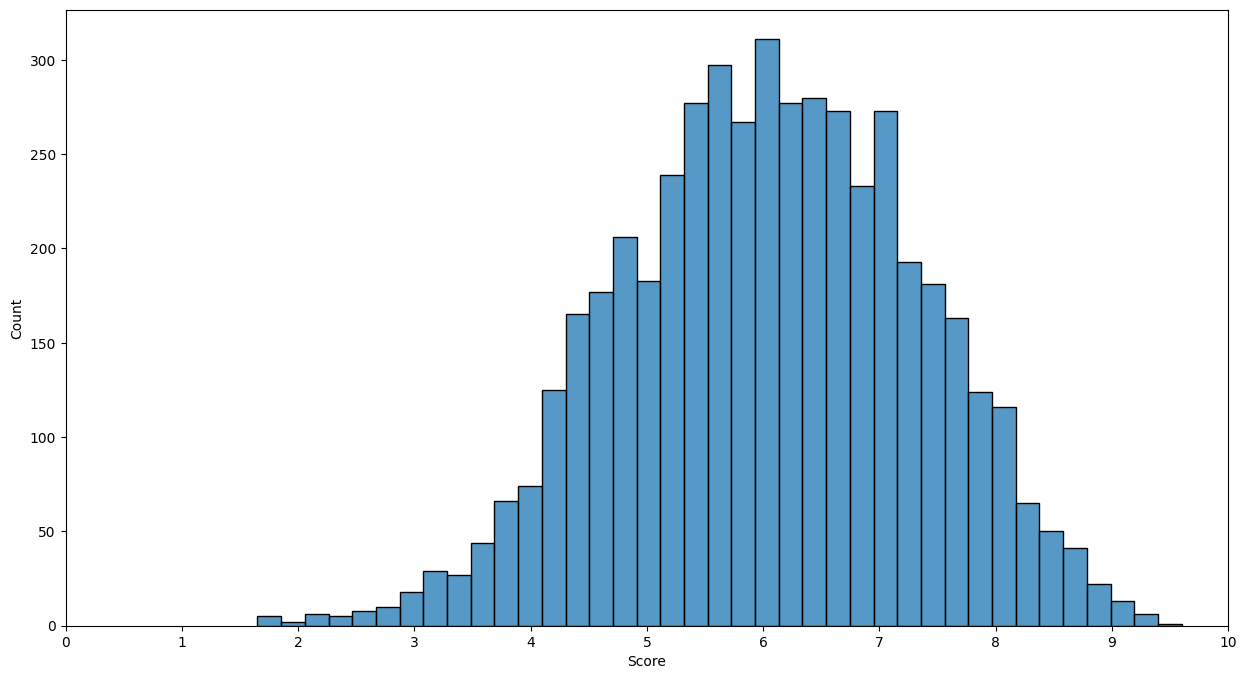

In [57]:
plt.figure(figsize=[15, 8])
sns.histplot(df_combined['Score'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.show()

In [58]:
df_combined.isnull().sum()

Title                0
Year                 0
Runtime              0
Genre                0
Rating               0
Budget               0
Gross US & Canada    0
Votes                0
Metascore            0
Clear_Genre          0
Revenue              0
Score                0
dtype: int64

In [59]:
df_combined.describe()

,Year,Runtime,Rating,Budget,Gross US & Canada,Votes,Metascore,Revenue,Score
count,4852.000000,4852.000000,4852.000000,4.852000e+03,4.852000e+03,4.852000e+03,4852.000000,4.852000e+03,4852.000000
mean,2001.323990,110.011748,6.521084,3.824052e+07,5.506905e+07,1.475403e+05,5.561232,1.682852e+07,6.041158
std,14.034844,18.983357,0.937819,4.401897e+07,7.469475e+07,2.173217e+05,1.771398,5.619899e+07,1.276333
min,1927.000000,63.000000,1.900000,6.000000e+03,1.098000e+03,6.770000e+02,0.900000,-1.769219e+08,1.650000
25%,1994.000000,97.000000,6.000000,1.000000e+07,1.278572e+07,3.445575e+04,4.300000,-8.242648e+06,5.200000
50%,2004.000000,107.000000,6.600000,2.300000e+07,3.189181e+07,7.482900e+04,5.600000,5.789897e+06,6.050000
75%,2012.000000,120.000000,7.200000,5.000000e+07,6.695487e+07,1.695832e+05,6.800000,2.843319e+07,6.950000
max,2022.000000,238.000000,9.300000,3.560000e+08,9.366622e+08,2.737594e+06,10.000000,6.916622e+08,9.600000


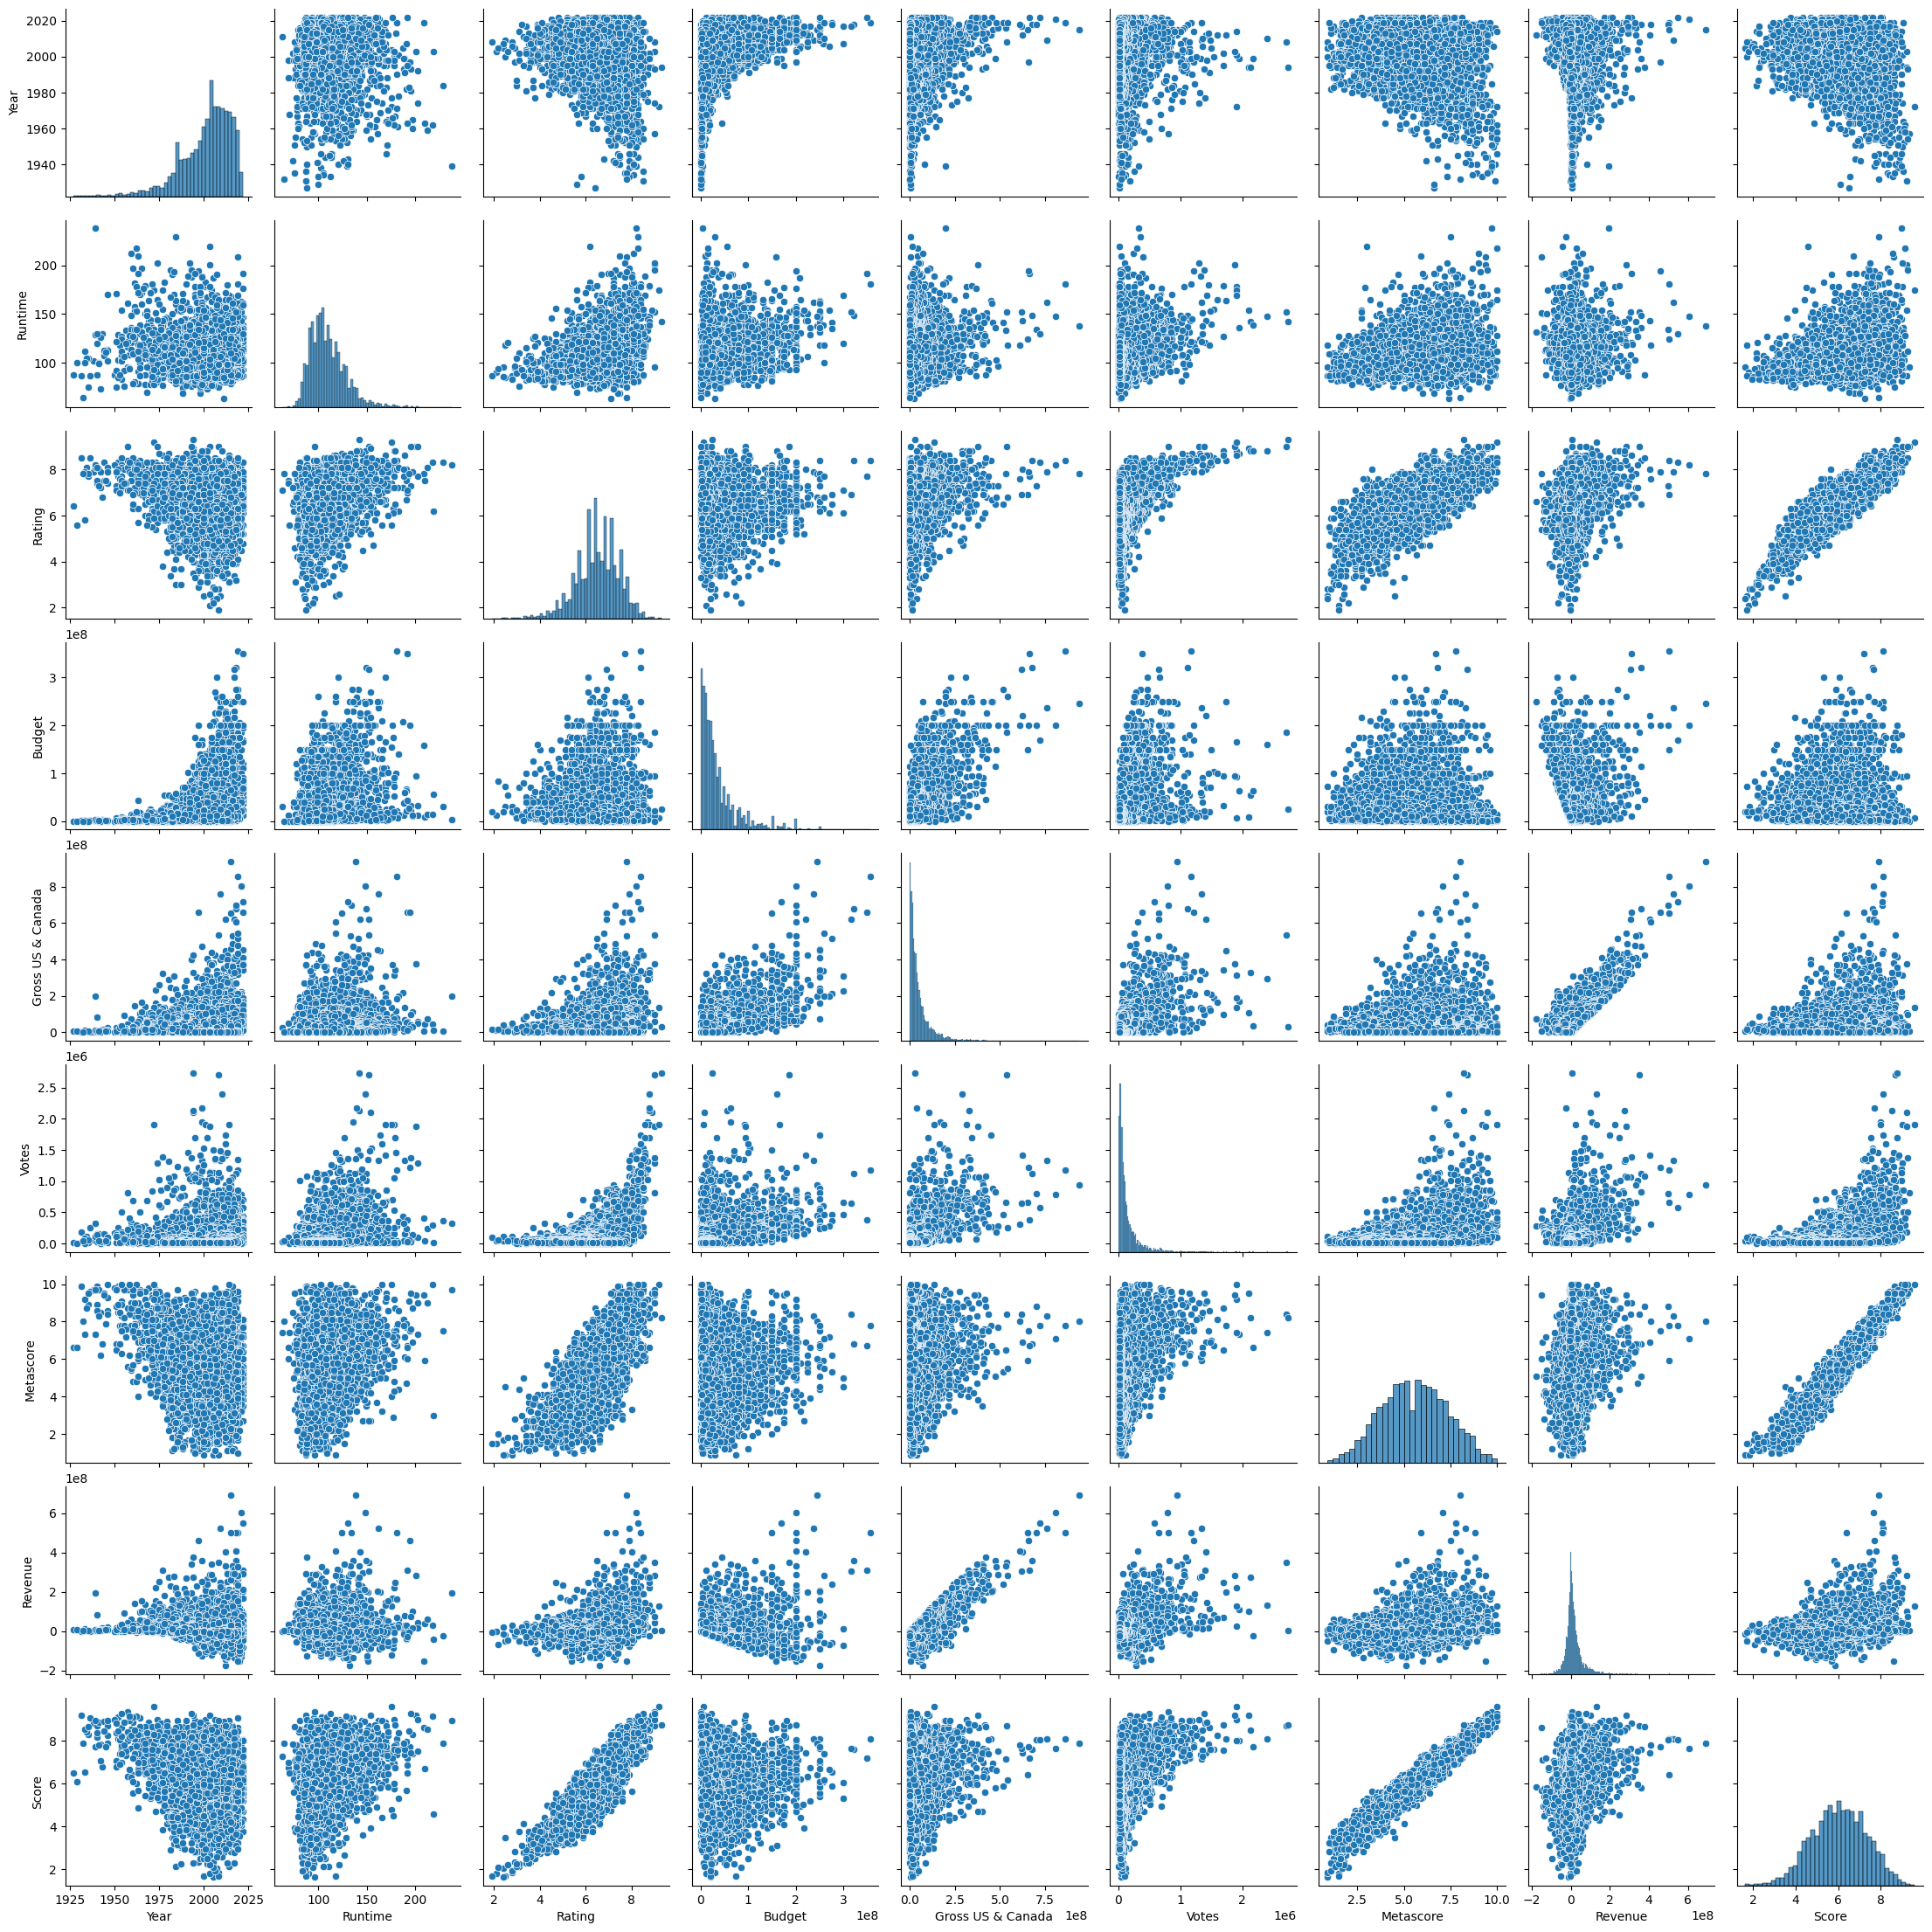

In [61]:
sns.pairplot(df_combined)